In [1]:
import tensorflow as tf
from utils import *
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

# Prepare VGG16 with dropout layers
raw_model = tf.keras.applications.vgg16.VGG16(include_top=True, weights='imagenet')
export_dropout_vgg16(0.8)
dropout_model = tf.keras.models.load_model("dropout_model.h5")
layer_name = "block5_conv3"

In [2]:
# Load and preprocess a sample image
input_image = np.load("images/ILSVRC2012_val_00034065.npy")
print("input shape:", input_image.shape)
preprocessed_input = np.expand_dims(tf.keras.applications.vgg16.preprocess_input(input_image), 0)

input shape: (224, 224, 3)


In [3]:
# Prediction of the raw model
category_index = np.argmax(raw_model(preprocessed_input))

In [4]:
# Raw grad-cam and score-cam
gradcam_image, _ = GradCam(raw_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224
       )
scorecam_image, _ = ScoreCam(raw_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224
       )

In [5]:
# MC-dropout grad-cam and score-cam
dropout_gradcam_image, _, dropout_gradcam_std_image = GradCam_Dropout(dropout_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224,
        sample = 100
       )

100%|██████████| 100/100 [01:08<00:00,  1.45it/s]


In [8]:
dropout_scorecam_image, _, dropout_scorecam_std_image= ScoreCam_Dropout(dropout_model,
        image = preprocessed_input,
        category_index = category_index,
       layer_name = layer_name,
        raw_array = input_image,
        dimension = 224,
        sample = 100
       )

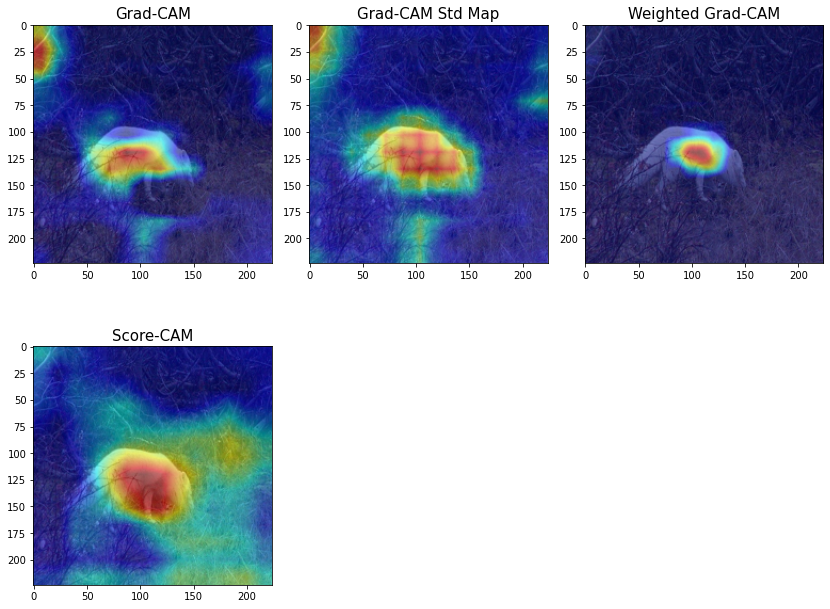

In [9]:
fignum = 3
fig = plt.figure()

ax0 = fig.add_subplot(1, fignum, 1)
ax0.imshow(Image.fromarray(gradcam_image))
ax0.set_title('Grad-CAM', fontsize=15)

ax1 = fig.add_subplot(1, fignum, 2)
ax1.imshow(Image.fromarray(dropout_gradcam_std_image))
ax1.set_title('Grad-CAM Std Map', fontsize=15)

ax2 = fig.add_subplot(1, fignum, 3)
ax2.imshow(Image.fromarray(dropout_gradcam_image))
ax2.set_title('Weighted Grad-CAM', fontsize=15)

ax0 = fig.add_subplot(2, fignum, 4)
ax0.imshow(Image.fromarray(scorecam_image))
ax0.set_title('Score-CAM', fontsize=15)

# ax1 = fig.add_subplot(2, fignum, 5)
# ax1.imshow(Image.fromarray(dropout_scorecam_std_image))
# ax1.set_title('Score-CAM Std Map', fontsize=15)

# ax2 = fig.add_subplot(2, fignum, 6)
# ax2.imshow(Image.fromarray(dropout_scorecam_image))
# ax2.set_title('Weighted Score-CAM', fontsize=15)

fig.set_size_inches(12, 18)
fig.tight_layout()